# Chapter 5: Understanding your data
#### * Machine Learning Mastery with Python, Jason Brownlee

### https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Pandas loading csv

In [15]:
from urllib.request import urlopen
from pandas import read_csv
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
data = read_csv(url, names=names)
print(data.shape)

(768, 9)



<h3>Attibute list:</h3>
<p>Pregnancies - Number of time pregnant</p>
<p><l>Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test</l></p>
<p><l>BloodPressure - Diastolic blood pressure (mm Hg)</l></p>
<p><l>SkinThicknessTriceps skin fold thickness (mm)</l></p>
<p><l>Insulin - 2-Hour serum insulin (mu U/ml)</l></p>
<p><l>BMI Body mass index (weight in kg/(height in m)^2)</l></p>
<p><l>DiabetesPedigreeFunction - Diabetes pedigree function</l></p>
<p><l>Age - Age (years)</l></p>
<p><l>Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0</l></p>

## Peek at data

In [16]:
print(data.head(20))

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

In [17]:
peek = data.head(5)
print(peek)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


## Data dimension and attribute types

In [18]:
data.shape

(768, 9)

In [19]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

## Descriptive statistics

In [20]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


## Class distribution (Classes and Categories)

#### Classification problems are susceptible to class imbalance in the raw dataset. To check class counts ...

In [21]:
data.groupby('class').size()

class
0    500
1    268
dtype: int64

## Checking for correlations between attributes

In [22]:
# Pairwsie Pearson correlation
from pandas import read_csv, set_option
set_option('precision', 3) # sets decimal places
data.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
plas,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
pres,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
skin,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
test,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
mass,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
pedi,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
class,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


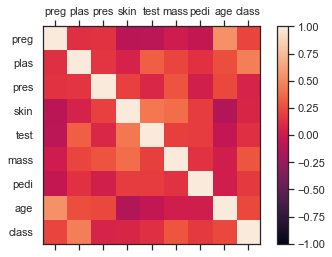

In [34]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy

correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

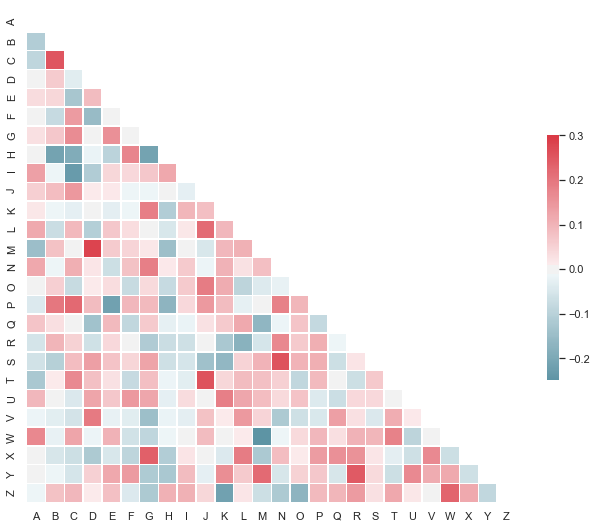

In [23]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

## Checking for skewness of distributions

### Note: Values closer to 0 are less skewed

In [35]:
# Note: Values closer to 0 are less skewed
data.skew()

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64